In [54]:
# importation des packages et bibliotheques
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pickle 
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score


In [2]:
#la lecture de notre base de données (Fichier Excel de extension .csv)
file_path = './data/train_u6lujuX_CVtuZ9i.csv'
# Read the CSV file into a pandas DataFrame
df = pd.read_csv(file_path)
#On afficher les donnes dans notre fichier 
df
#pour afficher toutes les donnes
#pd.set_option('display.max_row',df.shape[0]+1)
#df


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [3]:
#voir les valeurs manquantes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [4]:
df.describe()
#afficher les valeurs statistiques

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [6]:
#remplire les valeurs manquantes 
cat_data=[]
num_data=[]
for i, c in enumerate(df.dtypes):
    if c==object:
        #tous la colonne de ordre i
        cat_data.append(df.iloc[:,i])
    else:
        #les var numerique
        num_data.append(df.iloc[:,i])
           


In [7]:
cat_data=pd.DataFrame(cat_data).transpose()
num_data=pd.DataFrame(num_data).transpose()
#num_data = num_data.fillna(method='bfill', inplace=True)


# data cleaning

In [8]:
#pour les variables catégoriques on va remplacer les valeurs
#manquantes par les valeurs qui repete de plus
cat_data=cat_data.apply(lambda x:x.fillna(x.value_counts().index[0]))
cat_data.isnull().sum().any()


False

In [9]:
#pour les variables numérique on va remplacer par la valeur precedent de la meme collones
num_data.fillna(method='bfill',inplace=True)
num_data.isnull().sum().any()

False

In [158]:
#cat_data['Married'].value_counts()
#cat_data['Married'].str.strip().value_counts()
#num_data

In [145]:
#df
#on va changer loan-status par (Y  and N)1 et 0 qui 
#nfie est ce que on donne le credit ou Non

In [10]:
#on créer un dectionnaire 
target_value={'Y':1,'N':0}
target=cat_data['Loan_Status']
cat_data.drop('Loan_Status',axis=1,inplace=True)
target=target.map(target_value)
target

0      1
1      0
2      1
3      1
4      1
      ..
609    1
610    1
611    1
612    1
613    0
Name: Loan_Status, Length: 614, dtype: int64

In [11]:
#Méthode de faire Remplacement avec skelearn label encoder 1,0

le=LabelEncoder()
for i in cat_data:
    cat_data[i]=le.fit_transform(cat_data[i])
    
  #pour vérifier Data est recoit {0,1}

# Data de type Objet est transformé à {0,1}

In [12]:
#supprimer le colone de ID
df.drop('Loan_ID',axis=1,inplace=True)

In [51]:
#concatenation cat_data et num_data et spécifier la colonne target
# x pour les donnes independent (deja un credit ou non)
X=pd.concat([cat_data,num_data],axis=1)
#la réponse de la bank est stocker dans le y
y=target


In [14]:
#praparation de bd analyse Exploratoire (EDA)
#ingenerie  carateristique
#Netouyage
#il faut etudier la bas e de données 


# Analyse Exploratoire des Données 


In [30]:
#A partire de début de ce projet on commence par la compréhesion des données ec et appeler dans EDA 
#par 1.	Compréhension des données :
#le champe de Lean_status est sgnifie que on a déja données un 
#cédit un cliet ou non 1 ou 0 accepte ou NON
#target.value_counts() : nous avons voire le variable target qui nous à données les informatioq qui concerne les corédit qui 
#donnée par la banque et qui non donnée
#On a 1 'donnée': 422
#On a 0 'non donnée' : 192


In [36]:
# on va commencer par la variable target 
target.value_counts()
#les creidt accepter ou non" 
#La base de Données  de EDA
df=pd.concat([cat_data,num_data,target],axis=1)
#La ligne de code df = pd.concat([cat_data, num_data, target], axis=1) 
#effectue la concaténation de plusieurs objets de données
#horizontalement
#(le long de l'axe des colonnes) pour 
#former un nouveau DataFrame appelé df.

C:\Users\pc\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


le Pourcentage des crédit accordés est : 0.3127035830618892
le Pourcentage des crédit N*on accordés est : 0.6872964169381107


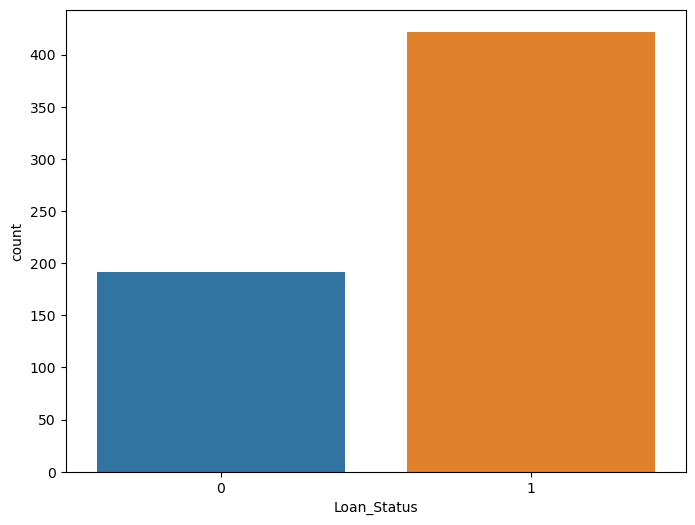

In [32]:
#la bas e de données utilisée pour EDA
plt.figure(figsize=(8,6))
sns.countplot(target)
yes=target.value_counts()[0]/len(target)
no=target.value_counts()[1]/len(target)
print(f'le Pourcentage des crédit accordés est : {yes}')
print(f'le Pourcentage des crédit N*on accordés est : {no}')
#nous avon utiliser la visualisation de 
#ces données pour bien comprendre 

C:\Users\pc\anaconda3\lib\site-packages\seaborn\axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\pc\anaconda3\lib\site-packages\seaborn\axisgrid.py:670: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


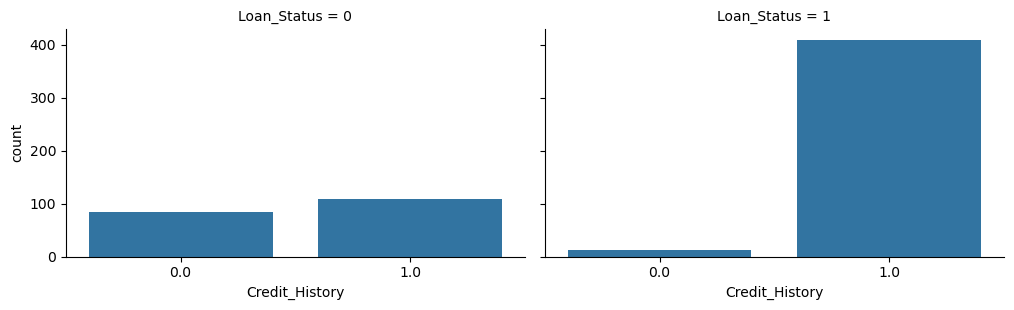

In [37]:
#voir ampact de variable par variable
#Crédit historique est deja un credit ou non
#ce script est trouver dans les sites web officielle 
grid=sns.FacetGrid(df,col='Loan_Status',size=3.2,aspect=1.6)
#on changer seulment le nom de ligne corespondent
grid.map(sns.countplot,'Credit_History')

C:\Users\pc\anaconda3\lib\site-packages\seaborn\axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\pc\anaconda3\lib\site-packages\seaborn\axisgrid.py:670: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


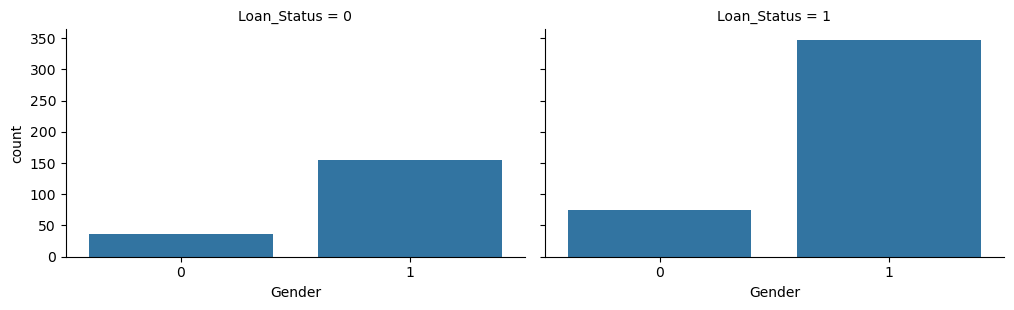

In [38]:
#Gender pour le sex qui sont accepter dans un credit
grid=sns.FacetGrid(df,col='Loan_Status',size=3.2,aspect=1.6)
grid.map(sns.countplot,'Gender')

C:\Users\pc\anaconda3\lib\site-packages\seaborn\axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\pc\anaconda3\lib\site-packages\seaborn\axisgrid.py:670: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


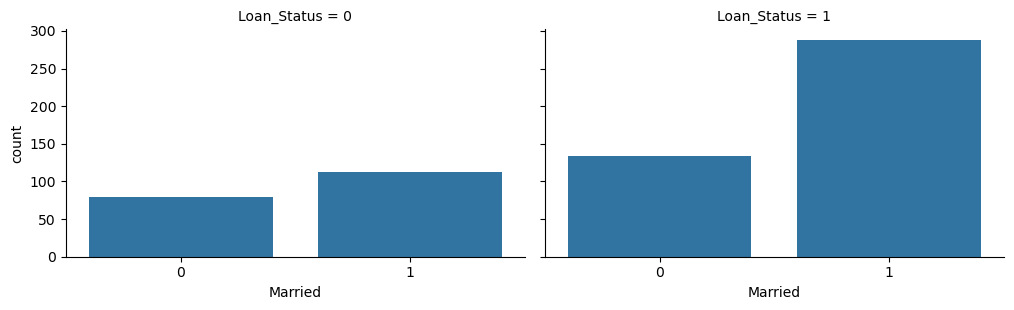

In [39]:
#les gender qui sont mariée
grid=sns.FacetGrid(df,col='Loan_Status',size=3.2,aspect=1.6)
grid.map(sns.countplot,'Married')

C:\Users\pc\anaconda3\lib\site-packages\seaborn\axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\pc\anaconda3\lib\site-packages\seaborn\axisgrid.py:670: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


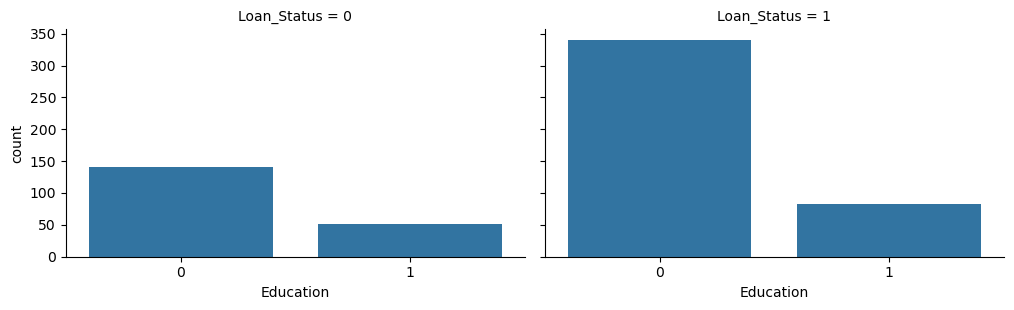

In [40]:
#pour Education  
grid=sns.FacetGrid(df,col='Loan_Status',size=3.2,aspect=1.6)
grid.map(sns.countplot,'Education')

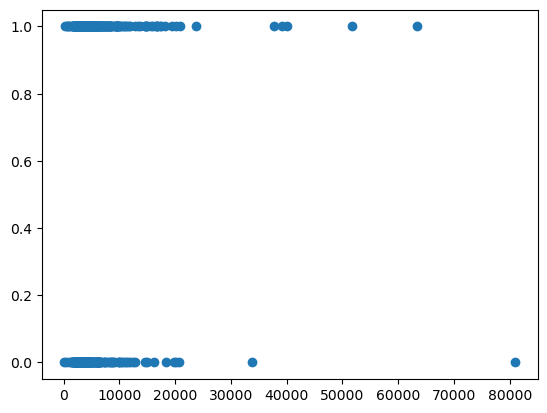

In [41]:
#revenu du demndeur 
plt.scatter(df['ApplicantIncome'],df['Loan_Status'])

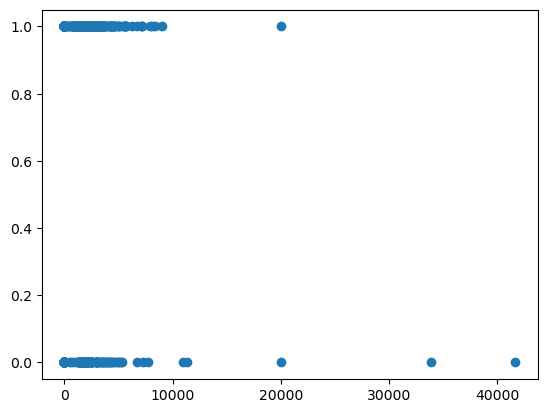

In [42]:
plt.scatter(df['CoapplicantIncome'],df['Loan_Status'])

In [58]:
df.groupby('Loan_Status').median()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
Loan_Status,,,,,
N,3833.5,268.0,129.0,360.0,1.0
Y,3812.5,1239.5,126.0,360.0,1.0


# Création de Modèl

In [52]:
#on divisée notre base de données en 2 (test,entrinment)
sss = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train, test in sss.split(X, y):
    X_train, X_test = X.iloc[train], X.iloc[test]
    y_train, y_test = y.iloc[train], y.iloc[test]
    print('X_train taille :', X_train.shape)
    print('X_test taille :', X_test.shape)
    print('y_train taille :', y_train.shape)
    print('y_test taille :', y_test.shape)

X_train taille : (491, 12)
X_test taille : (123, 12)
y_train taille : (491,)
y_test taille : (123,)


In [53]:
#Création de Modèle 
#on va appliquer trois algoruthme et prendre la meilleurs Algorithmes
#Logistique regression, KNN, DecisionTree

In [59]:
#LogisticRegression
#KNeighborsClassifier
#DecisionTreeClassifier

#on definit une liste des modeles
#models={
 #   'LogisticRegression':LogisticRegression(random_state=42),
 #   'KNeighborsClassifier':KNeighborsClassifier(),
 #   'DecisionTreeClassifier':DecisionTreeClassifier(max_depth=1,random_state=42)
#}
#On définire de précision 
#pour valider les modules 
    #la fonction de précisison 
  #  def accu(y_true,y_pred,retu=False):
     #   acc=accuracy_score(y_true,y_pred)
     #   if retu:
      #      return acc
      #  else
    #        print(f'la precision du modèlke est :{acc}')        
     #la fonction d'application des modèle        
    # def train_test_eval(models,X_train,y_train,X_test,y_test):
       #     for name, model in models.items():
        #        print(name,':')
        #        model.fit(X_train,y_train)
                #on faire Evaluation
         #       accu(y_test,model.predict(X_test))
         #       print('-'*30)
  #  train_test_eval(models,X_train,y_train,X_test,y_test)
            

In [60]:
models={
    'LogisticRegression':LogisticRegression(random_state=42),
    'KNeighborsClassifier':KNeighborsClassifier(),
    'DecisionTreeClassifier':DecisionTreeClassifier(max_depth=1,random_state=42)
}
def accu(y_true, y_pred, retu=False):
    acc = accuracy_score(y_true, y_pred)
    if retu:
        return acc
    else:
        print(f'La précision du modèle est : {acc}')

# La fonction d'application des modèles
def train_test_eval(models, X_train, y_train, X_test, y_test):
    for name, model in models.items():
        print(name, ':')
        model.fit(X_train, y_train)
        # On fait l'évaluation
        accu(y_test, model.predict(X_test))
        print('-' * 30)

# Appel de la fonction train_test_eval avec vos données
train_test_eval(models, X_train, y_train, X_test, y_test)
#on choisire regression logistique

LogisticRegression :
La précision du modèle est : 0.8536585365853658
------------------------------
KNeighborsClassifier :
La précision du modèle est : 0.6097560975609756
------------------------------
DecisionTreeClassifier :
La précision du modèle est : 0.8455284552845529
------------------------------


C:\Users\pc\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\pc\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warn

In [63]:
#X_2=X['Credit_History','Gender','Married','CoapplicantIncome','ApplicantIncome']


In [72]:
X_2 = X[['Credit_History' , 'Married', 'CoapplicantIncome']]


In [73]:
sss = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

for train, test in sss.split(X_2, y):
    X_train, X_test = X_2.iloc[train], X_2.iloc[test]
    y_train, y_test = y.iloc[train], y.iloc[test]
    print('X_train taille :', X_train.shape)
    print('X_test taille :', X_test.shape)
    print('y_train taille :', y_train.shape)
    print('y_test taille :', y_test.shape)

    # Pour tester
#train_test_eval(models, X_train, y_train, X_test, y_test)


X_train taille : (491, 3)
X_test taille : (123, 3)
y_train taille : (491,)
y_test taille : (123,)


In [70]:
train_test_eval(models, X_train, y_train, X_test, y_test)

LogisticRegression :
La précision du modèle est : 0.8536585365853658
------------------------------
KNeighborsClassifier :
La précision du modèle est : 0.6991869918699187
------------------------------
DecisionTreeClassifier :
La précision du modèle est : 0.8455284552845529
------------------------------


C:\Users\pc\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [74]:
#Appliquer la regression logistique sur notre base de données 
Classifier=LogisticRegression()
Classifier.fit(X_2,y)

LogisticRegression()

In [77]:
#Enregistrer le modele
pickle.dump(Classifier,open('model.pkl','wb'))